# III. Data Analysis
## Assignment 2
### Step 1: Set up the Environment
- Start by importing all the necessary libraries like `pandas`, `matplotlib`, `seaborn`, and `scikit-learn`.

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

### Step 2: Loading the Data
- Load your CSV file into a Pandas DataFrame for further analysis.

In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv('ceberus_combined_output.csv')
df.head()  # Display the first few rows of the dataset

,time-local,maximum_gust_kmh,air_temperature,msl_pres,minimum_air_temperature,maximum_gust_dir,wind_dir_deg,pres,rainfall,qnh_pres,...,apparent_temp,wind_spd,wind_dir,wind_spd_kmh,dew_point,rain_ten,rain_hour,wind_gust_spd,gust_kmh,rainfall_24hr
0,2018-01-01T18:00:00+11:00,35.0,19.4,1007.0,19.2,SSW,200,1007.0,0.0,1007.0,...,15.7,13,SSW,24,12.7,0.0,0.0,19,35,0.0
1,2018-01-01T18:10:00+11:00,35.0,19.6,NaN,19.2,SSW,218,NaN,0.0,NaN,...,15.6,13,SW,24,11.8,NaN,NaN,17,32,0.0
2,2018-01-01T18:20:00+11:00,35.0,19.4,NaN,19.2,SSW,217,NaN,0.0,NaN,...,15.9,12,SW,22,12.1,NaN,NaN,16,30,0.0
3,2018-01-01T18:30:00+11:00,35.0,19.3,1007.2,19.2,SSW,219,1007.2,0.0,1007.2,...,15.8,12,SW,22,12.1,0.0,0.0,18,33,0.0
4,2018-01-01T18:40:00+11:00,35.0,19.2,NaN,19.1,SSW,201,NaN,0.0,NaN,...,15.2,13,SSW,24,11.7,NaN,NaN,17,32,0.0


### Step 3: Data Overview and Cleaning
- Check for missing values and handle them (if necessary) by either filling or removing them.

In [4]:
# Check for missing values
df.isnull().sum()

# Fill missing values for numerical columns with the mean
numeric_cols = df.select_dtypes(include=['number']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# For categorical columns, fill missing values with the mode
for col in df.select_dtypes(include=['object']).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

/var/folders/gv/rtnszm0j6zv_rcttl_93t75r0000gn/T/ipykernel_9620/3320735306.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


### Step 4: Exploratory Data Ananlysis EDA
Create visualizations directly in the notebook, such as histograms, scatter plots, and heatmaps to explore the data.

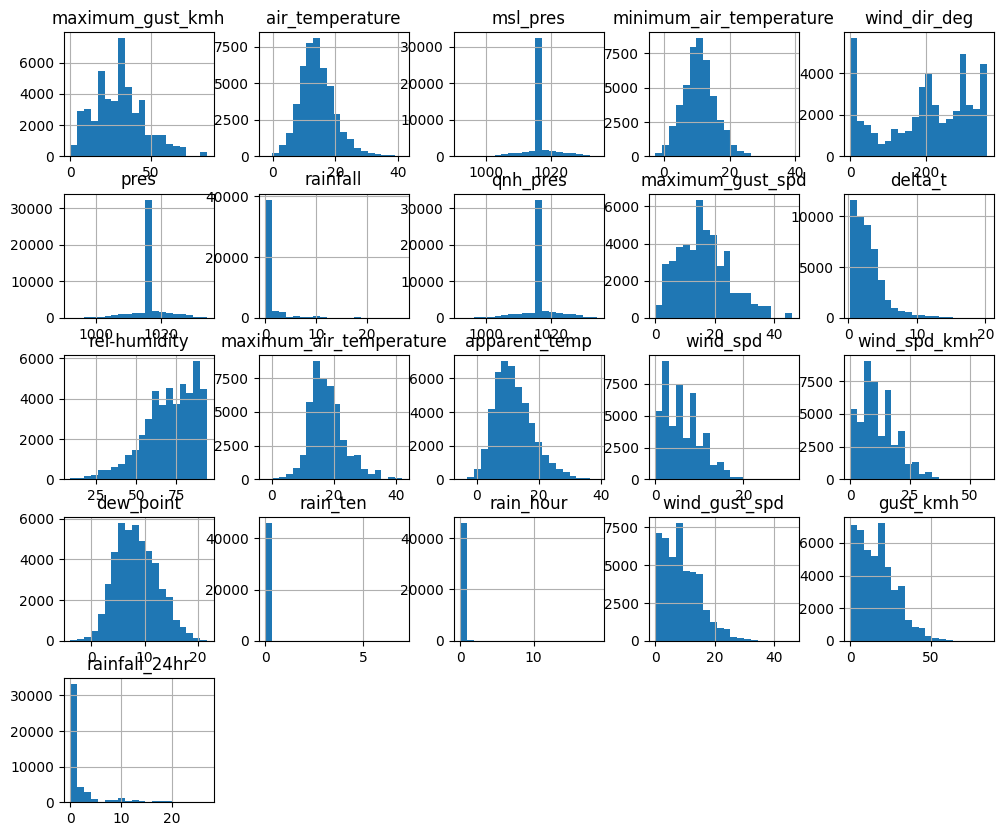

In [5]:
import matplotlib.pyplot as plt

# Plot histograms for all numerical columns
df.hist(figsize=(12, 10), bins=20)
plt.show()


### 2. Histogram: Distribution of Wind Speeds
A histogram will help us visualize the distribution of wind speeds across your dataset.

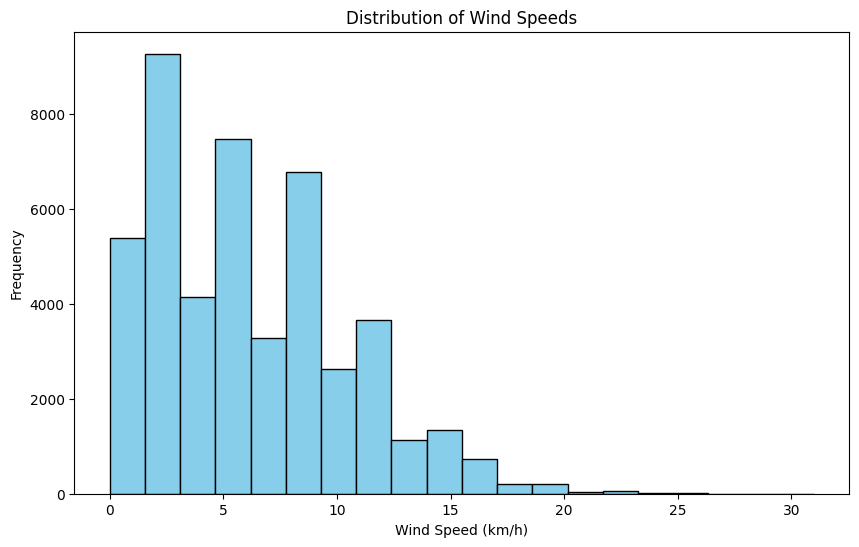

In [7]:
plt.figure(figsize=(10, 6))
plt.hist(df['wind_spd'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Wind Speeds')
plt.xlabel('Wind Speed (km/h)')
plt.ylabel('Frequency')
plt.show()

### 3. Proportion of Wind Directions

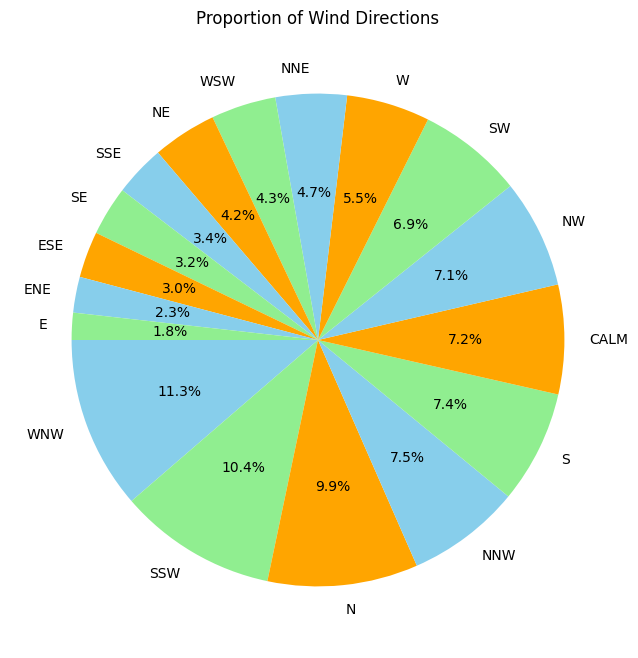

In [12]:
# Pie chart for wind direction proportions
plt.figure(figsize=(10, 8))
df['wind_dir'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=180, colors=['skyblue', 'lightgreen', 'orange'])
plt.title('Proportion of Wind Directions')
plt.ylabel('')
plt.show()


### 4. Air Temperature vs Relative Humidity

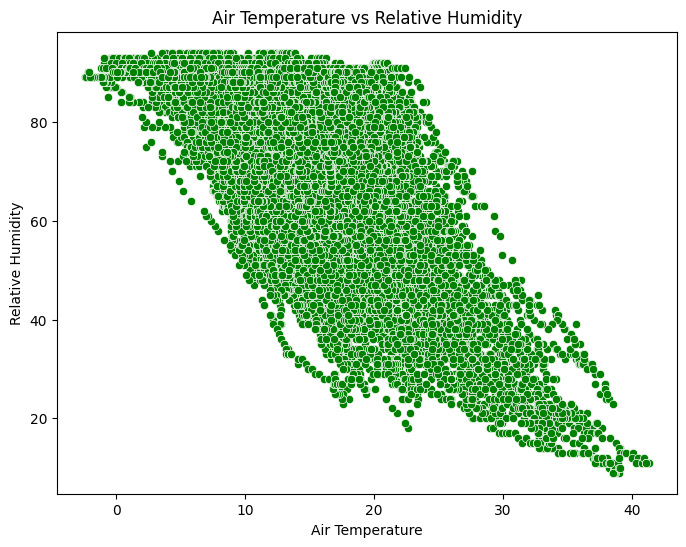

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load the DataFrame from a CSV file
df = pd.read_csv('ceberus_combined_output.csv')  

# Scatter plot for air temperature vs humidity
plt.figure(figsize=(8, 6))
sns.scatterplot(x='air_temperature', y='rel-humidity', data=df, color='green')
plt.xlabel('Air Temperature')
plt.ylabel('Relative Humidity')
plt.title('Air Temperature vs Relative Humidity')
plt.show()

### 5. Scatter Plot: Wind Speed vs. Temperature
Scatter plots are useful for understanding relationships between two numerical features, such as wind speed and temperature.

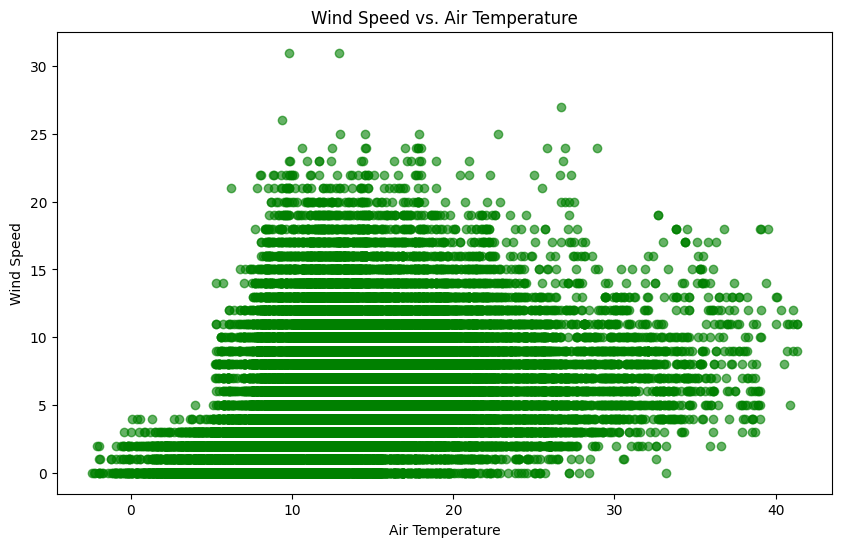

In [8]:
plt.figure(figsize=(10, 6))
plt.scatter(df['air_temperature'], df['wind_spd'], color='green', alpha=0.6)
plt.title('Wind Speed vs. Air Temperature')
plt.xlabel('Air Temperature')
plt.ylabel('Wind Speed')
plt.show()


### 6. Heatmap: Correlation Between Numerical Variables
A heatmap can visualize the correlation between different numerical features in the dataset.

Index(['time-local', 'maximum_gust_kmh', 'air_temperature', 'msl_pres',
       'minimum_air_temperature', 'maximum_gust_dir', 'wind_dir_deg', 'pres',
       'rainfall', 'qnh_pres', 'maximum_gust_spd', 'delta_t', 'rel-humidity',
       'maximum_air_temperature', 'apparent_temp', 'wind_spd', 'wind_dir',
       'wind_spd_kmh', 'dew_point', 'rain_ten', 'rain_hour', 'wind_gust_spd',
       'gust_kmh', 'rainfall_24hr'],
      dtype='object')


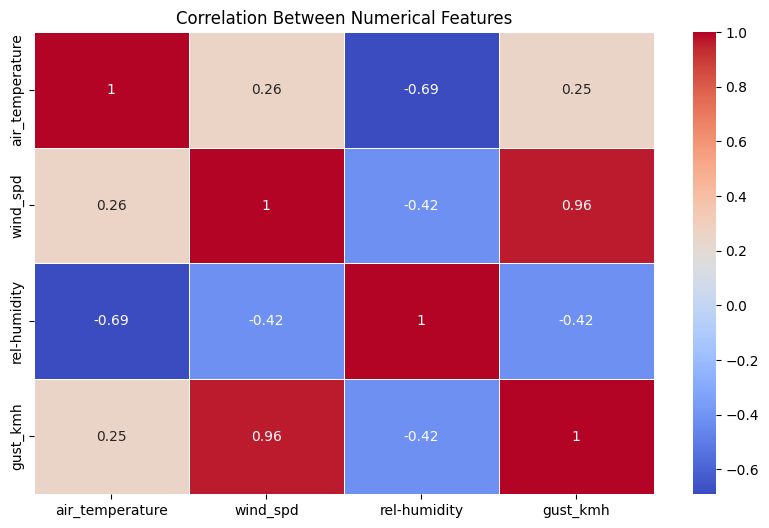

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# List the column names to check for the correct names
print(df.columns)

# Calculate correlation matrix with the correct column names
corr_matrix = df[['air_temperature', 'wind_spd', 'rel-humidity', 'gust_kmh']].corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Between Numerical Features')
plt.show()

### 7. Boxplot: Wind Gust Speed Distribution Across Wind Directions
A boxplot can show the distribution of wind gust speeds across different wind directions.

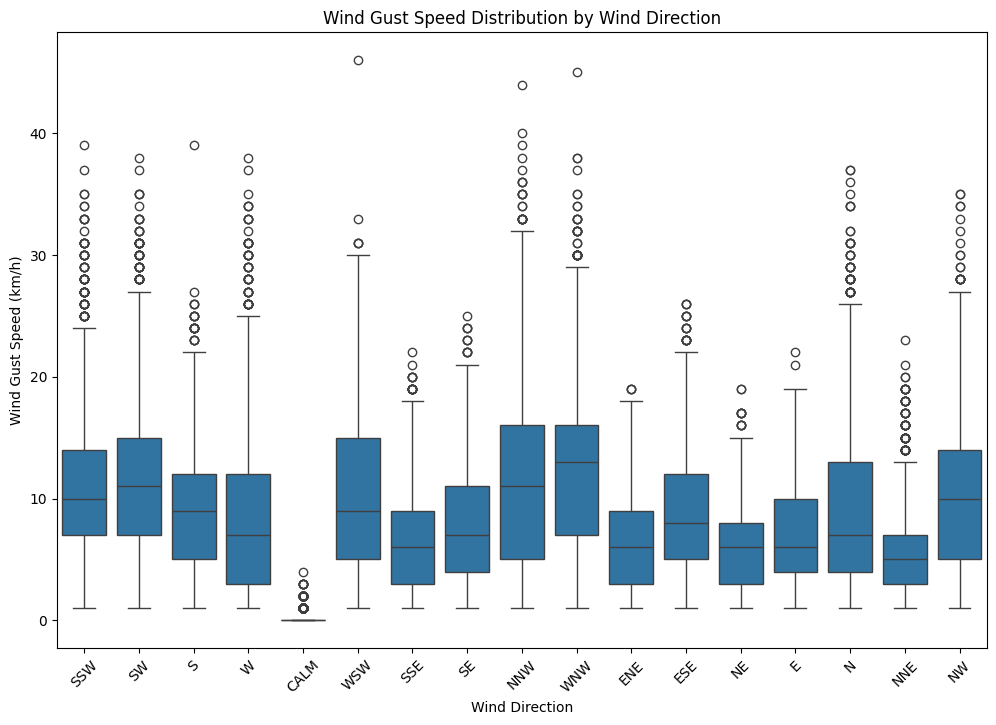

In [11]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='wind_dir', y='wind_gust_spd', data=df)
plt.title('Wind Gust Speed Distribution by Wind Direction')
plt.xlabel('Wind Direction')
plt.ylabel('Wind Gust Speed (km/h)')
plt.xticks(rotation=45)
plt.show()


### 8. Pairplot: Exploring Pairwise Relationships


Index(['time-local', 'maximum_gust_kmh', 'air_temperature', 'msl_pres',
       'minimum_air_temperature', 'maximum_gust_dir', 'wind_dir_deg', 'pres',
       'rainfall', 'qnh_pres', 'maximum_gust_spd', 'delta_t', 'rel-humidity',
       'maximum_air_temperature', 'apparent_temp', 'wind_spd', 'wind_dir',
       'wind_spd_kmh', 'dew_point', 'rain_ten', 'rain_hour', 'wind_gust_spd',
       'gust_kmh', 'rainfall_24hr'],
      dtype='object')


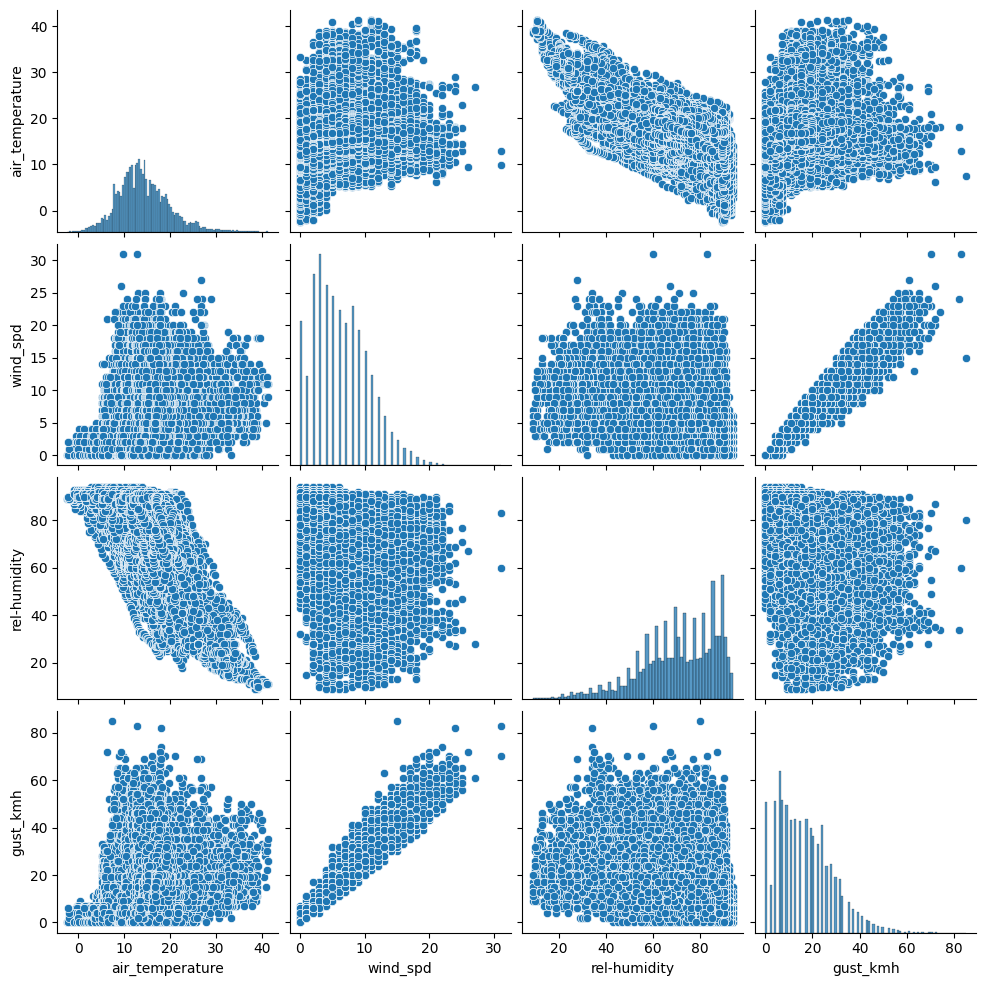

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# List the column names to check for the correct names
print(df.columns)

# Update the pairplot with the correct column names
sns.pairplot(df[['air_temperature', 'wind_spd', 'rel-humidity', 'gust_kmh']])
plt.show()